In [29]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

df = datasets.load_boston()

#### Loading Boston dataset

In [30]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
X = df.data
y = df.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [32]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### working with just room feature

In [33]:
X_room = X[:,5]
X_room = X_room.reshape(-1,1)

Text(0.5, 0, 'Number of rooms')

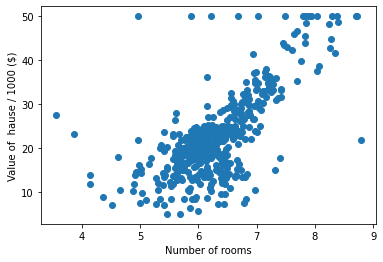

In [34]:
plt.scatter(X_room, y)
plt.ylabel('Value of  hause / 1000 ($)')
plt.xlabel('Number of rooms')

In [35]:
prediction_space = np.linspace(min(X_room), max(X_room))
prediction_space[0:5,:]

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082]])

In [36]:
reg = LinearRegression()
reg.fit(X_room, y)

fit_line = reg.predict(prediction_space)

Text(0.5, 0, 'Number of rooms')

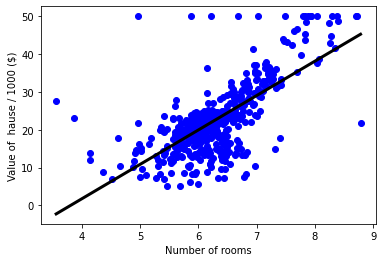

In [37]:
plt.scatter(X_room, y, color = 'blue')
plt.plot(prediction_space, fit_line, color = 'black', linewidth = 3)
plt.ylabel('Value of  hause / 1000 ($)')
plt.xlabel('Number of rooms')

#### working on the all features

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test) # Computes R-squared

0.711226005748496

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. 
These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. 
RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.

In [40]:
MSE = mean_squared_error(y_test, y_pred, squared = True)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(f'MSE = {MSE}')
print(f'RMSE = {RMSE}')

MSE = 21.517444231176995
RMSE = 4.638689926172797


# Calculate the above manually

In [41]:
MSE_manually = np.mean((y_pred-y_test)**2)
MSE_manually

21.517444231176995

# Noise

In [42]:
y_noise = np.var(y_test)
y_noise

74.51309556786703

# Variance

In [43]:
Var = np.var(y_pred)
Var

65.08018554722912

# Bias ????

In [44]:
bias = MSE-Var-y_noise
bias

-118.07583688391915

#### performance score using cross validation

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cv_scores = cross_val_score(reg_all, X_train, y_train, cv =5)
cv_scores

array([0.74541483, 0.52216586, 0.75607169, 0.76738846, 0.64887182])

In [47]:
print(f'R-squared = {np.mean(cv_scores).round(2)}, (+/-{np.std(cv_scores).round(2)})')

R-squared = 0.69, (+/-0.09)
